<a href="https://colab.research.google.com/github/OscarLoOscar/python_Data_Science/blob/main/002.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#data wrangling
#4種方法join table

In [1]:
import pandas as pd

In [2]:
data1 = {
    'name': ['Amy','Benny','Cindy'],
    "score" :[70,40,90]
}

df1 = pd.DataFrame(data1)
print(df1)

    name  score
0    Amy     70
1  Benny     40
2  Cindy     90


In [3]:
data2 = {
    "name": ['Amy','Benny','Danny'],
    'passed': [True,False,True]
}

df2 = pd.DataFrame(data2)
print(df2)


    name  passed
0    Amy    True
1  Benny   False
2  Danny    True


In [4]:
#1st joining
df = df1.merge(df2,how = 'inner') # SQLinnerjoin
print(df)

    name  score  passed
0    Amy     70    True
1  Benny     40   False


In [5]:
df = df1.merge(df2,how = 'outer')
print(df) #NaN = Null ,data cleaning要處理

    name  score passed
0    Amy   70.0   True
1  Benny   40.0  False
2  Cindy   90.0    NaN
3  Danny    NaN   True


In [6]:
df=df1.merge(df2,how ='left')
print(df)

    name  score passed
0    Amy     70   True
1  Benny     40  False
2  Cindy     90    NaN


In [7]:
# df1 right join
df=df2.merge(df1,how ='left')
print(df)

    name  passed  score
0    Amy    True   70.0
1  Benny   False   40.0
2  Danny    True    NaN


In [8]:
import plotly.express as px

In [12]:
df = px.data.tips()
print(df.to_string()) # to_string() -> print all data
# 餐廳消費

     total_bill    tip     sex smoker   day    time  size
0         16.99   1.01  Female     No   Sun  Dinner     2
1         10.34   1.66    Male     No   Sun  Dinner     3
2         21.01   3.50    Male     No   Sun  Dinner     3
3         23.68   3.31    Male     No   Sun  Dinner     2
4         24.59   3.61  Female     No   Sun  Dinner     4
5         25.29   4.71    Male     No   Sun  Dinner     4
6          8.77   2.00    Male     No   Sun  Dinner     2
7         26.88   3.12    Male     No   Sun  Dinner     4
8         15.04   1.96    Male     No   Sun  Dinner     2
9         14.78   3.23    Male     No   Sun  Dinner     2
10        10.27   1.71    Male     No   Sun  Dinner     2
11        35.26   5.00  Female     No   Sun  Dinner     4
12        15.42   1.57    Male     No   Sun  Dinner     2
13        18.43   3.00    Male     No   Sun  Dinner     4
14        14.83   3.02  Female     No   Sun  Dinner     2
15        21.58   3.92    Male     No   Sun  Dinner     2
16        10.3

In [13]:
df1 = df.pivot_table(index = 'sex',columns ='time',values='tip')
print(df1)

time      Dinner     Lunch
sex                       
Female  3.002115  2.582857
Male    3.144839  2.882121


In [14]:
df1 = df.pivot_table(index = 'sex',columns ='time',values='total_bill')
print(df1)

time       Dinner      Lunch
sex                         
Female  19.213077  16.339143
Male    21.461452  18.048485


In [15]:
df1 = df.pivot_table(index = 'sex',columns ='time',values='tip',aggfunc='mean')#defort左 , aggfunc影響點得出個值 -> mean / sum
print(df1)

time      Dinner     Lunch
sex                       
Female  3.002115  2.582857
Male    3.144839  2.882121


In [16]:
df1 = df.pivot_table(index = 'sex',columns ='time',values='tip',aggfunc='sum')
print(df1)

time    Dinner  Lunch
sex                  
Female  156.11  90.40
Male    389.96  95.11


In [18]:
df1 = df.pivot_table(index = 'sex',columns =['time','smoker'],values='tip',aggfunc='mean')
print(df1)

time      Dinner             Lunch          
smoker        No       Yes      No       Yes
sex                                         
Female  3.044138  2.949130  2.4596  2.891000
Male    3.158052  3.123191  2.9415  2.790769


In [19]:
df1 = df.pivot_table(index = 'sex',columns =['time','smoker','day'],values='tip',aggfunc='sum')
print(df1)


time   Dinner                                           Lunch               \
smoker     No                         Yes                  No          Yes   
day       Fri     Sat     Sun Thur    Fri    Sat    Sun   Fri   Thur   Fri   
sex                                                                          
Female   3.25   35.42   46.61  3.0  10.80  43.03  14.00   3.0  58.49  7.98   
Male     5.00  104.21  133.96  NaN  16.23  77.74  52.82   NaN  58.83  5.70   

time           
smoker         
day      Thur  
sex            
Female  20.93  
Male    30.58  


In [20]:
df1 = df.pivot_table(index = ['sex','smoker'],columns =['time','day'],values='tip',aggfunc='sum')
print(df1)

time          Dinner                      Lunch       
day              Fri     Sat     Sun Thur   Fri   Thur
sex    smoker                                         
Female No       3.25   35.42   46.61  3.0  3.00  58.49
       Yes     10.80   43.03   14.00  NaN  7.98  20.93
Male   No       5.00  104.21  133.96  NaN   NaN  58.83
       Yes     16.23   77.74   52.82  NaN  5.70  30.58


In [21]:
#記format ，拎internet csv data
# step 1
import plotly.graph_objs as go
airbnb_url = 'https://raw.githubusercontent.com/ManarOmar/New-York-Airbnb-2019/master/AB_NYC_2019.csv'
airbnb_ori = pd.read_csv(airbnb_url)
airbnb = airbnb_ori.copy()
airbnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [22]:
#step 2
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [27]:
#step 3
def missing_cols(df):
  for col in df.columns:
    missing_vals = df[col].isnull().sum() #isnull作用：將columns內的null轉成TRUE
    if missing_vals !=0 : # true=0 ,false =1
      print(col)
      print(missing_vals)

missing_cols(airbnb)

name
16
host_name
21
last_review
10052
reviews_per_month
10052


In [28]:
# step 4
def pref_missing(df):
  for col in df.columns:
    pct = df[col].isnull().mean()*100
    if pct !=0:
      print(col)
      print(pct)

pref_missing(airbnb)

name
0.03272318232948154
host_name
0.04294917680744453
last_review
20.55833929849678
reviews_per_month
20.55833929849678


In [29]:
#step 5
nullMap = airbnb.isnull().replace(to_replace=[False,True],value=[0,1])
print(nullMap.head())

   id  name  host_id  host_name  neighbourhood_group  neighbourhood  latitude  \
0   0     0        0          0                    0              0         0   
1   0     0        0          0                    0              0         0   
2   0     0        0          0                    0              0         0   
3   0     0        0          0                    0              0         0   
4   0     0        0          0                    0              0         0   

   longitude  room_type  price  minimum_nights  number_of_reviews  \
0          0          0      0               0                  0   
1          0          0      0               0                  0   
2          0          0      0               0                  0   
3          0          0      0               0                  0   
4          0          0      0               0                  0   

   last_review  reviews_per_month  calculated_host_listings_count  \
0            0               

In [30]:
#用heatmap睇null value分布
fig = go.Figure(data=go.Heatmap(
    z=nullMap
))

fig.show()

In [31]:
airbnb1 = airbnb.drop(['id','host_name','last_review'],axis=1)
print(airbnb1)

                                                    name   host_id  \
0                     Clean & quiet apt home by the park      2787   
1                                  Skylit Midtown Castle      2845   
2                    THE VILLAGE OF HARLEM....NEW YORK !      4632   
3                        Cozy Entire Floor of Brownstone      4869   
4       Entire Apt: Spacious Studio/Loft by central park      7192   
...                                                  ...       ...   
48890    Charming one bedroom - newly renovated rowhouse   8232441   
48891      Affordable room in Bushwick/East Williamsburg   6570630   
48892            Sunny Studio at Historical Neighborhood  23492952   
48893               43rd St. Time Square-cozy single bed  30985759   
48894  Trendy duplex in the very heart of Hell's Kitchen  68119814   

      neighbourhood_group       neighbourhood  latitude  longitude  \
0                Brooklyn          Kensington  40.64749  -73.97237   
1               Man

In [32]:
airbnb2 = airbnb.dropna()
print(airbnb2)

             id                                              name    host_id  \
0          2539                Clean & quiet apt home by the park       2787   
1          2595                             Skylit Midtown Castle       2845   
3          3831                   Cozy Entire Floor of Brownstone       4869   
4          5022  Entire Apt: Spacious Studio/Loft by central park       7192   
5          5099         Large Cozy 1 BR Apartment In Midtown East       7322   
...         ...                                               ...        ...   
48782  36425863        Lovely Privet Bedroom with Privet Restroom   83554966   
48790  36427429                          No.2 with queen size bed  257683179   
48799  36438336                                   Seas The Moment  211644523   
48805  36442252                     1B-1B apartment near by Metro  273841667   
48852  36455809           Cozy Private Room in Bushwick, Brooklyn   74162901   

         host_name neighbourhood_group 

In [33]:
#method1
airbnb2 = airbnb.dropna()
print(airbnb2.reset_index())# 重新將已ignore nullvalue data 重新排序

       index        id                                              name  \
0          0      2539                Clean & quiet apt home by the park   
1          1      2595                             Skylit Midtown Castle   
2          3      3831                   Cozy Entire Floor of Brownstone   
3          4      5022  Entire Apt: Spacious Studio/Loft by central park   
4          5      5099         Large Cozy 1 BR Apartment In Midtown East   
...      ...       ...                                               ...   
38816  48782  36425863        Lovely Privet Bedroom with Privet Restroom   
38817  48790  36427429                          No.2 with queen size bed   
38818  48799  36438336                                   Seas The Moment   
38819  48805  36442252                     1B-1B apartment near by Metro   
38820  48852  36455809           Cozy Private Room in Bushwick, Brooklyn   

         host_id    host_name neighbourhood_group    neighbourhood  latitude  \
0      

In [34]:
#method2
airbnb3 = airbnb1.fillna(value={'reviews_per_month':airbnb1['reviews_per_month'].median()}) #餵左dictionary,median識處理null value
print(airbnb3)

                                                    name   host_id  \
0                     Clean & quiet apt home by the park      2787   
1                                  Skylit Midtown Castle      2845   
2                    THE VILLAGE OF HARLEM....NEW YORK !      4632   
3                        Cozy Entire Floor of Brownstone      4869   
4       Entire Apt: Spacious Studio/Loft by central park      7192   
...                                                  ...       ...   
48890    Charming one bedroom - newly renovated rowhouse   8232441   
48891      Affordable room in Bushwick/East Williamsburg   6570630   
48892            Sunny Studio at Historical Neighborhood  23492952   
48893               43rd St. Time Square-cozy single bed  30985759   
48894  Trendy duplex in the very heart of Hell's Kitchen  68119814   

      neighbourhood_group       neighbourhood  latitude  longitude  \
0                Brooklyn          Kensington  40.64749  -73.97237   
1               Man

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats


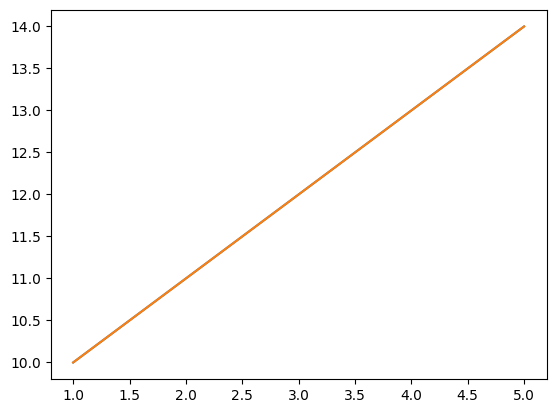

In [38]:
x = [1,2,3,4,5]
y = [10,11,12,13,14]

# 線性回歸
slope,intercept, r, p, std_err = stats.linregress(x, y) #成句要抄足先拎到所有野

def bestfit(x):
  return slope * x + intercept

a = [1,2,3]
def addOne(x):
  return x+1

myModel = list(map(bestfit,x))

plt.plot(x,y)
plt.plot(x,myModel)
plt.show()

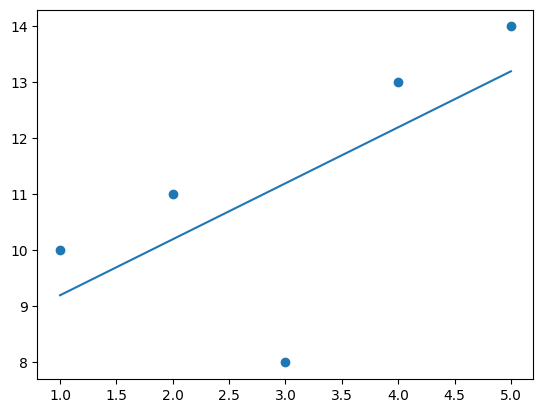

0.6622661785325219


In [39]:
x = [1,2,3,4,5]
y = [10,11,8,13,14]

slope,intercept, r, p, std_err = stats.linregress(x, y) #成句要抄足先拎到所有野

def bestfit(x):
  return slope * x + intercept

a = [1,2,3]
def addOne(x):
  return x+1

myModel = list(map(bestfit,x))

plt.scatter(x,y)
plt.plot(x,myModel)
plt.show()


print(r)

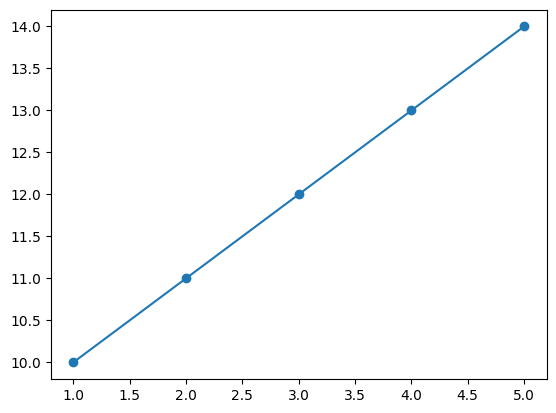

1.0


In [40]:
x = [1,2,3,4,5]
y = [10,11,12,13,14]

slope,intercept, r, p, std_err = stats.linregress (x, y)

def bestfit(x):
  return slope * x + intercept

a = [1,2,3]
def addOne(x):
  return x+1

myModel = list(map(bestfit,x))

plt.scatter(x,y)
plt.plot(x,myModel)
plt.show()

print(r)

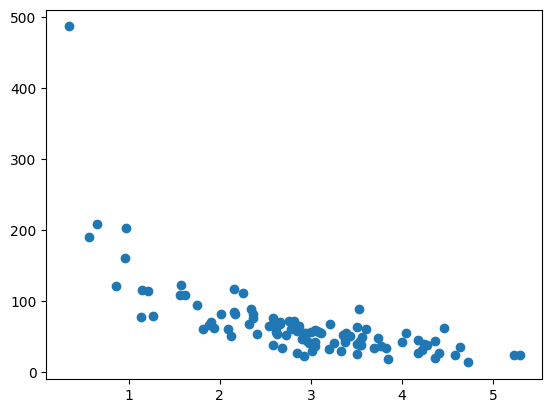

In [41]:
np.random.seed(2)

x = np.random.normal(3,1,100)
y = np.random.normal(150,40,100) / x

plt.scatter(x,y)
plt.show()

In [42]:
train_x =x[:80] #cut開dataset，80做training，20做testing,避免overfit，underfit
train_y =y[:80]

test_x=x[80:]
test_y=y[80:]
#純粹係80:20，82比

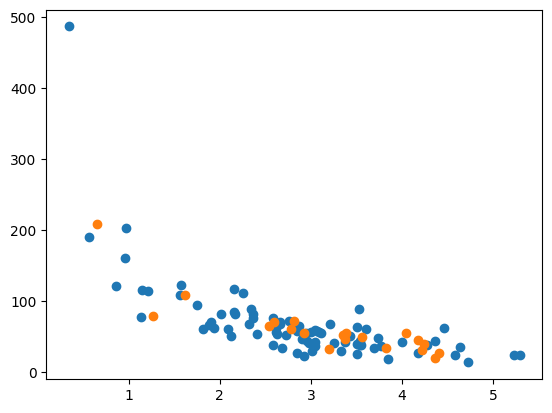

In [43]:
plt.scatter(train_x,train_y)
plt.scatter(test_x, test_y)
plt.show()

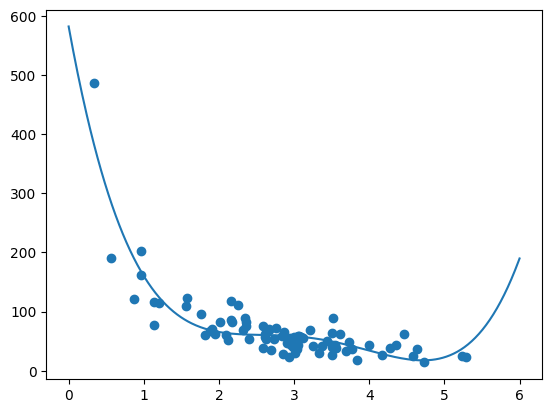

In [51]:
mymodel = np.poly1d(np.polyfit(train_x,train_y,4)) #4係轉灣次數,ting / Underfitting

myline = np.linspace(0,6,500)

plt.scatter(train_x,train_y)
plt.plot(myline,mymodel(myline))
plt.show()

In [52]:
from sklearn.metrics import r2_score

r2 = r2_score(train_y, mymodel(train_x))

print(r2)

0.79886455446298


In [57]:
# get data from Google drive
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
car = pd.read_csv('/content/drive/MyDrive/csv/cars.csv')
display(car.head(10))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Car,Model,Volume,Weight,CO2
0,Toyoty,Aygo,1000,790,99
1,Mitsubishi,Space Star,1200,1160,95
2,Skoda,Citigo,1000,929,95
3,Fiat,500,900,865,90
4,Mini,Cooper,1500,1140,105
5,VW,Up!,1000,929,105
6,Skoda,Fabia,1400,1109,90
7,Mercedes,A-Class,1500,1365,92
8,Ford,Fiesta,1500,1112,98
9,Audi,A1,1600,1150,99


In [58]:
import plotly.express as px
fig = px.scatter_3d(car,x = 'Weight',
                        y = 'Volume',
                        z = 'CO2')

fig.show()


In [59]:
# Multivariate
# Multivariate Polynomial Regression,好多noise

fig = px.scatter_3d(car,x = 'Weight',
                        y = 'Volume',
                        z = 'CO2',
                        color = 'Car')
fig.show()


In [60]:
from sklearn import linear_model
# machine learning

In [61]:
x = car[['Weight','Volume']]
y = car['CO2']

regr = linear_model.LinearRegression()
regr.fit(x,y)



LinearRegression()

In [62]:
predictCO2 = regr.predict([[2300,1200]])
print(predictCO2)

[106.42820705]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



In [63]:
#睇權重，邊樣影響大DD
print(regr.coef_)
#Regression,目的：用連續data predict另一個data
#Classification用黎predict不連續data
#KNN，K Nearest Neighbor

[0.00755095 0.00780526]


In [55]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
alcohol = pd.read_csv('/content/drive/MyDrive/csv/alcohol-consumption-vs-gdp-per-capita.csv')
display(alcohol.head(10))


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Entity,Code,Year,"Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)","GDP per capita, PPP (constant 2017 international $)",Population (historical estimates),Continent
0,Abkhazia,OWID_ABK,2015,NaN,NaN,NaN,Asia
1,Afghanistan,AFG,2010,0.21,1957.029070,29185511.0,NaN
2,Afghanistan,AFG,2015,0.21,2068.265904,34413603.0,Asia
3,Afghanistan,AFG,2018,0.21,2033.804389,37171922.0,NaN
4,Afghanistan,AFG,2002,NaN,1189.784668,22600774.0,NaN
5,Afghanistan,AFG,2003,NaN,1235.810063,23680871.0,NaN
6,Afghanistan,AFG,2004,NaN,1200.278013,24726689.0,NaN
7,Afghanistan,AFG,2005,NaN,1286.793659,25654274.0,NaN
8,Afghanistan,AFG,2006,NaN,1315.789117,26433058.0,NaN
9,Afghanistan,AFG,2007,NaN,1460.825751,27100542.0,NaN


In [64]:
df = px.data.iris()

print(df)

     sepal_length  sepal_width  petal_length  petal_width    species  \
0             5.1          3.5           1.4          0.2     setosa   
1             4.9          3.0           1.4          0.2     setosa   
2             4.7          3.2           1.3          0.2     setosa   
3             4.6          3.1           1.5          0.2     setosa   
4             5.0          3.6           1.4          0.2     setosa   
..            ...          ...           ...          ...        ...   
145           6.7          3.0           5.2          2.3  virginica   
146           6.3          2.5           5.0          1.9  virginica   
147           6.5          3.0           5.2          2.0  virginica   
148           6.2          3.4           5.4          2.3  virginica   
149           5.9          3.0           5.1          1.8  virginica   

     species_id  
0             1  
1             1  
2             1  
3             1  
4             1  
..          ...  
145      

In [65]:
x = df.iloc[:,0:4].values #多左.values會ignore左label，純粹要數字
y = df.iloc[:,4].values
print(x)
print(y)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.1 1.5 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [66]:
from sklearn.model_selection import train_test_split
x_train, x_test,y_train,y_test = train_test_split(x,y,test_size=0.2) #0.2=20% data 做 test
print(x_train)

[[6.7 3.  5.  1.7]
 [6.3 2.9 5.6 1.8]
 [6.  3.4 4.5 1.6]
 [4.6 3.4 1.4 0.3]
 [4.4 3.2 1.3 0.2]
 [7.6 3.  6.6 2.1]
 [7.  3.2 4.7 1.4]
 [5.1 3.8 1.9 0.4]
 [5.4 3.4 1.5 0.4]
 [7.7 3.8 6.7 2.2]
 [5.9 3.  5.1 1.8]
 [4.8 3.4 1.9 0.2]
 [5.7 3.  4.2 1.2]
 [5.8 2.7 3.9 1.2]
 [5.7 2.8 4.5 1.3]
 [7.9 3.8 6.4 2. ]
 [6.3 2.8 5.1 1.5]
 [6.  2.9 4.5 1.5]
 [6.  3.  4.8 1.8]
 [5.9 3.  4.2 1.5]
 [5.8 2.8 5.1 2.4]
 [6.9 3.2 5.7 2.3]
 [5.5 2.4 3.7 1. ]
 [7.2 3.6 6.1 2.5]
 [6.8 3.  5.5 2.1]
 [6.3 3.3 4.7 1.6]
 [5.2 4.1 1.5 0.1]
 [5.8 2.7 4.1 1. ]
 [6.3 2.5 4.9 1.5]
 [4.8 3.  1.4 0.3]
 [5.5 3.5 1.3 0.2]
 [5.5 2.5 4.  1.3]
 [6.7 3.3 5.7 2.5]
 [5.1 3.8 1.5 0.3]
 [5.7 4.4 1.5 0.4]
 [4.8 3.4 1.6 0.2]
 [5.  2.  3.5 1. ]
 [5.6 3.  4.5 1.5]
 [5.  3.5 1.3 0.3]
 [6.2 2.9 4.3 1.3]
 [4.5 2.3 1.3 0.3]
 [6.8 2.8 4.8 1.4]
 [4.4 2.9 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [5.7 2.9 4.2 1.3]
 [5.6 2.5 3.9 1.1]
 [5.8 4.  1.2 0.2]
 [6.4 2.9 4.3 1.3]
 [7.2 3.2 6.  1.8]
 [7.1 3.  5.9 2.1]
 [5.  3.6 1.4 0.2]
 [4.8 3.  1.4 0.1]
 [6.7 2.5 5.

In [67]:
from sklearn.preprocessing import StandardScaler

In [68]:
scaler = StandardScaler()
scaler.fit(x_train)

StandardScaler()

In [69]:
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)
print(x_train)
#距離mean有幾多標準差


[[ 1.0175755  -0.11438414  0.72283321  0.70673238]
 [ 0.54792527 -0.33940211  1.06166128  0.84049876]
 [ 0.1956876   0.78568777  0.44047649  0.572966  ]
 [-1.44808822  0.78568777 -1.3101352  -1.16599695]
 [-1.68291333  0.33565181 -1.36660655 -1.29976333]
 [ 2.07428853 -0.11438414  1.62637473  1.2417979 ]
 [ 1.36981318  0.33565181  0.55341918  0.30543324]
 [-0.86102543  1.68575967 -1.02777848 -1.03223057]
 [-0.50878775  0.78568777 -1.25366386 -1.03223057]
 [ 2.19170109  1.68575967  1.68284608  1.37556428]
 [ 0.07827504 -0.11438414  0.77930456  0.84049876]
 [-1.2132631   0.78568777 -1.02777848 -1.29976333]
 [-0.15655008 -0.11438414  0.27106246  0.03790047]
 [-0.03913752 -0.78943807  0.10164842  0.03790047]
 [-0.15655008 -0.56442009  0.44047649  0.17166685]
 [ 2.4265262   1.68575967  1.51343204  1.10803152]
 [ 0.54792527 -0.56442009  0.77930456  0.43919962]
 [ 0.1956876  -0.33940211  0.44047649  0.43919962]
 [ 0.1956876  -0.11438414  0.60989052  0.84049876]
 [ 0.07827504 -0.11438414  0.27

In [73]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5)
classifier.fit(x_train,y_train)

KNeighborsClassifier()

In [74]:
y_pred = classifier.predict(x_test)
print(y_pred)

['virginica' 'versicolor' 'setosa' 'virginica' 'virginica' 'setosa'
 'setosa' 'versicolor' 'versicolor' 'virginica' 'virginica' 'versicolor'
 'virginica' 'virginica' 'setosa' 'versicolor' 'virginica' 'virginica'
 'virginica' 'setosa' 'setosa' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'setosa' 'setosa' 'virginica' 'versicolor' 'setosa']


In [75]:
print(y_test)

['virginica' 'versicolor' 'setosa' 'virginica' 'virginica' 'setosa'
 'setosa' 'versicolor' 'versicolor' 'virginica' 'virginica' 'versicolor'
 'virginica' 'virginica' 'setosa' 'versicolor' 'virginica' 'virginica'
 'virginica' 'setosa' 'setosa' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'setosa' 'setosa' 'virginica' 'versicolor' 'setosa']


In [76]:
from sklearn.metrics import confusion_matrix

In [77]:
print(confusion_matrix(y_test,y_pred))

[[ 9  0  0]
 [ 0 10  0]
 [ 0  0 11]]


In [78]:
import numpy as np
error = []

for i in range(1,40):
  knn = KNeighborsClassifier(n_neighbors = i)
  knn.fit(x_train,y_train)
  pred_i = knn.predict(x_test)
  error.append(np.mean(pred_i !=y_test))

print(error)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.03333333333333333, 0.0, 0.03333333333333333, 0.03333333333333333, 0.03333333333333333, 0.03333333333333333, 0.06666666666666667, 0.06666666666666667, 0.06666666666666667, 0.06666666666666667]


Text(0, 0.5, 'Mean Error')

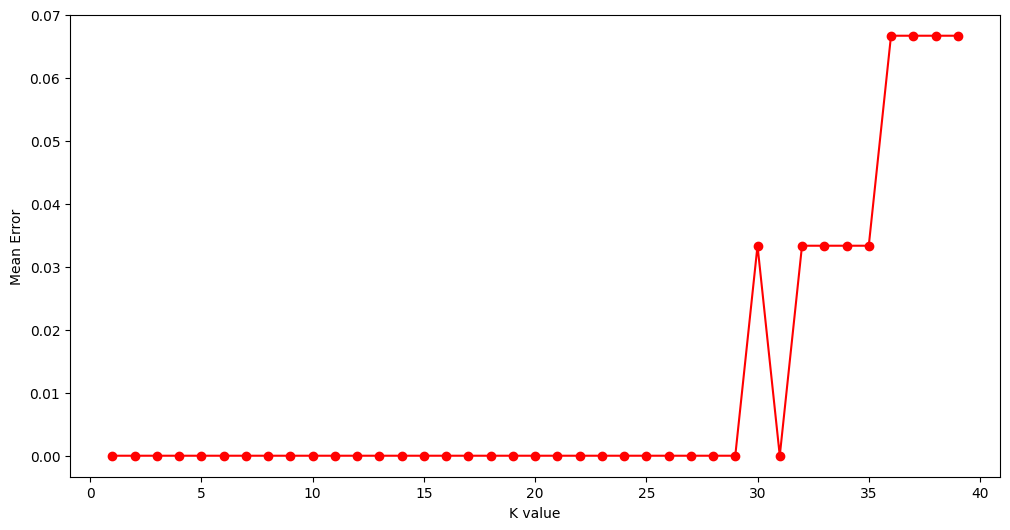

In [79]:
import matplotlib.pyplot as plt
plt.figure(figsize = (12,6))
plt.plot(range(1,40),error ,color='red',marker='o')
plt.xlabel('K value')
plt.ylabel('Mean Error')